In [2]:
import pandas as pd
import numpy as np
from expelliarmus import Wizard
from pathlib import Path

In [198]:
df1 = pd.read_csv('../csv_data/direct1secbiasroi.csv', header=None, names=['x','y','p','t'])

In [200]:
df1['t'] = df1['t'] - df1['t'].min() # start time at 0
#convert to seconds
df1['t'] = df1['t'] / 1000000

In [201]:
counts = df1.groupby(['x','y']).size().reset_index(name='counts')

most_common_pair = counts.sort_values('counts', ascending=False)

In [202]:
most_common_pair

,x,y,counts
2836,822,390,51
2261,818,394,51
4406,833,399,50
3804,829,353,49
3139,824,405,49
...,...,...,...
5925,846,479,1
5413,841,446,1
166,801,473,1
5729,844,482,1


In [203]:
df_pixel = df1[(df1['x']==most_common_pair.iloc[10]['x']) & (df1['y']==most_common_pair.iloc[10]['y'])].sort_values('t')
df_pixel.reset_index(inplace=True, drop=True)
df_pixel

,x,y,p,t
0,839,362,0,0.619804
1,839,362,0,0.619804
2,839,362,0,0.619804
3,839,362,0,0.619804
4,839,362,0,0.620015
5,839,362,0,0.620429
6,839,362,0,0.621877
7,839,362,1,1.620526
8,839,362,1,1.620610
9,839,362,0,2.621357


<Axes: xlabel='t'>

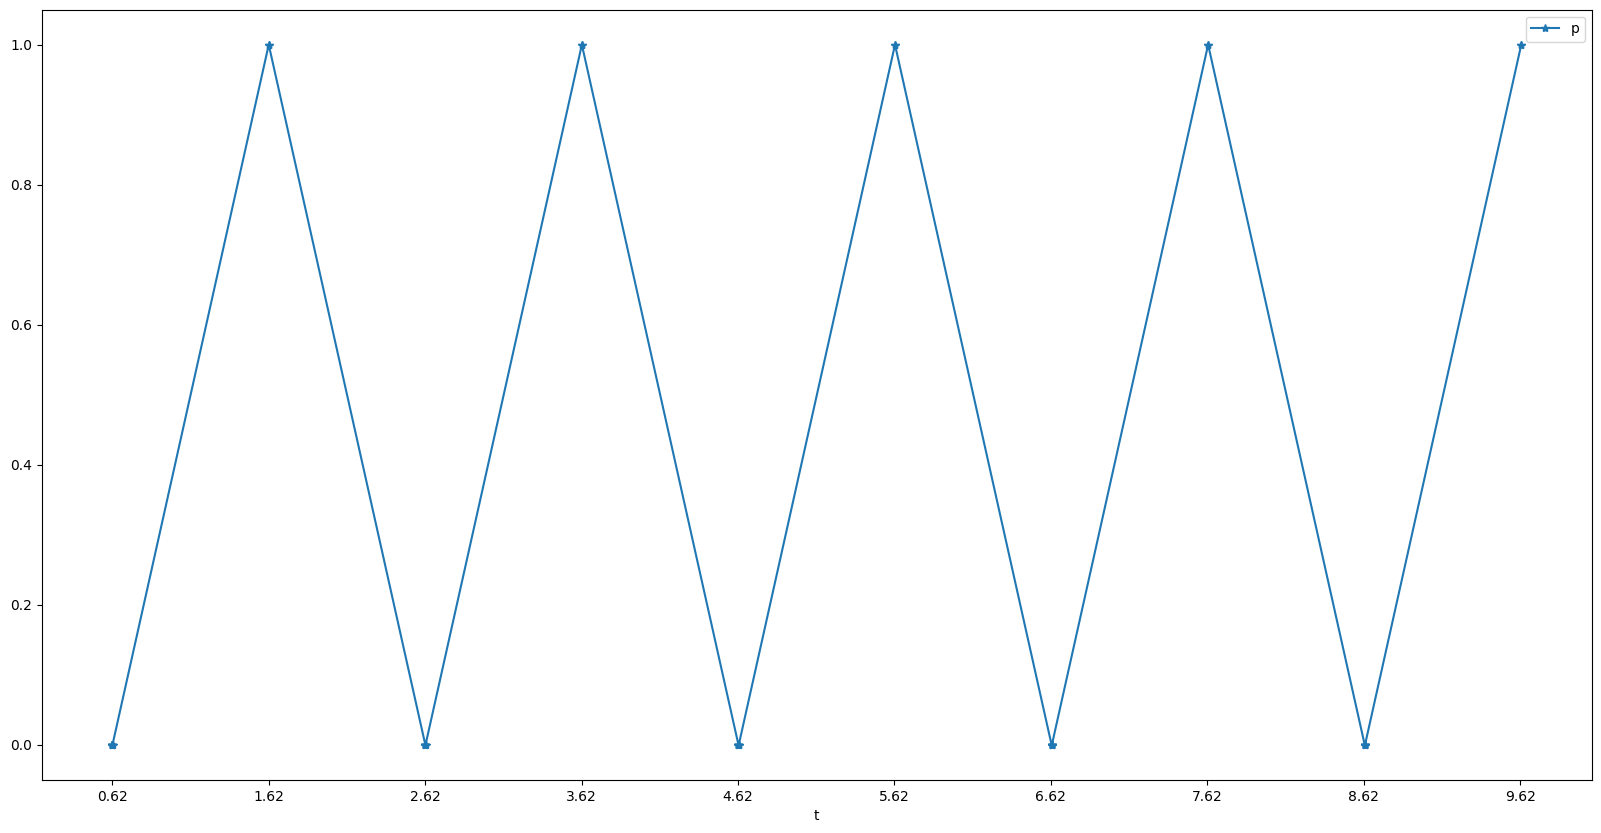

In [207]:
df_pixel[0:1000].plot(x='t', y='p', kind='line', marker='*', xticks=np.arange(df_pixel['t'].min(), df_pixel['t'].max(), 1),figsize=(20,10))

First event encoded as (t, x, y, p): (7492271, 810, 436, 1)
Number of events: 139172.
Recording duration: 20.581345 s.


<Axes: xlabel='t'>

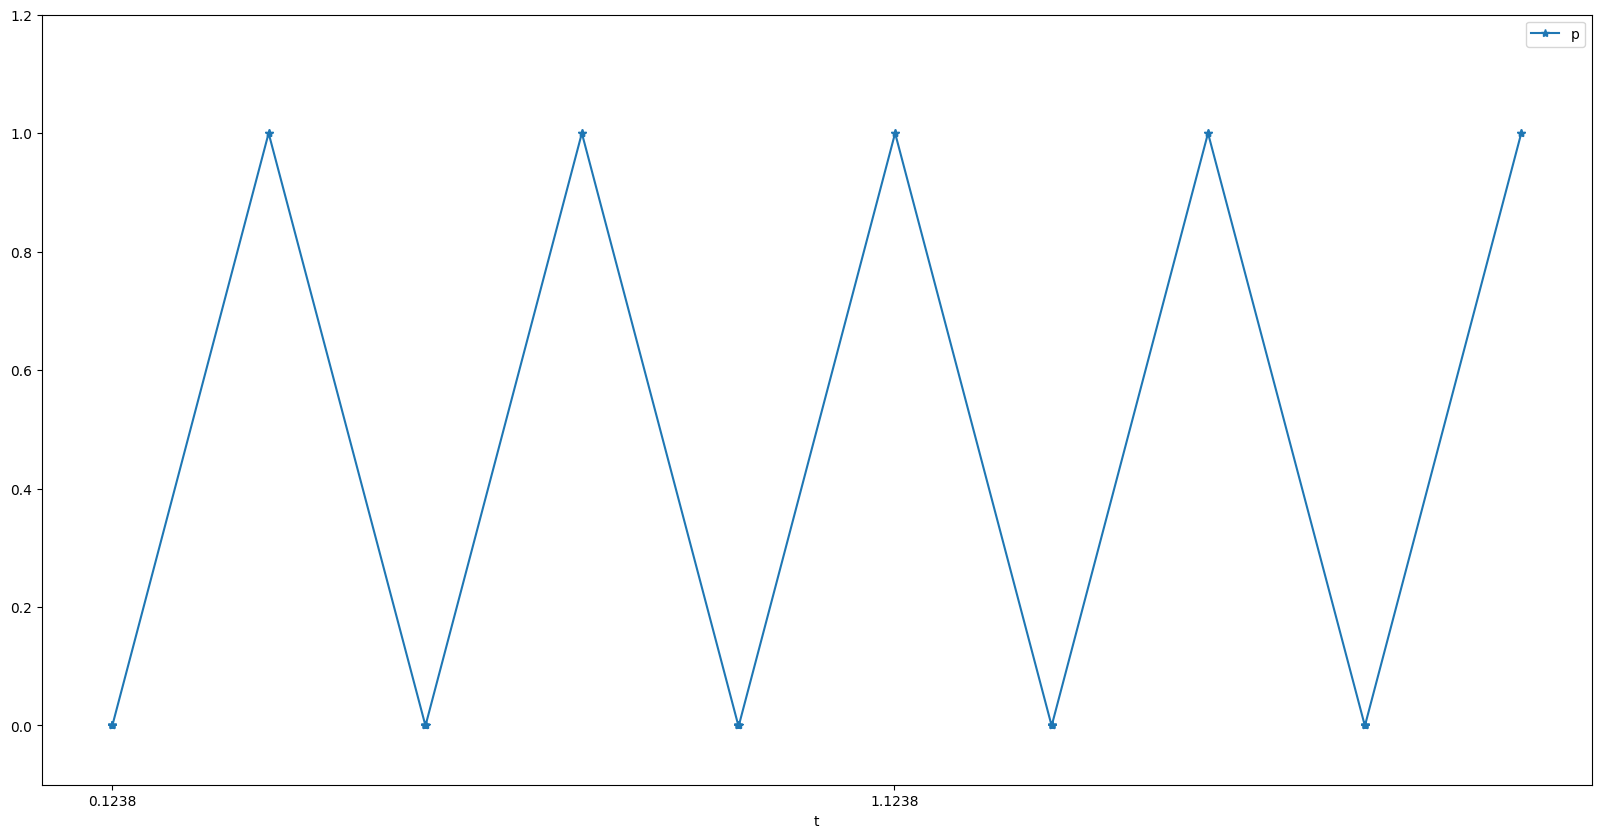

In [4]:

# wiz = Wizard(encoding='evt3', time_window=1000000)
# fpath = Path('../data/direct1secbiasroi.raw')

# wiz.set_file(fpath)
# arr = wiz.read()
# print(f"First event encoded as (t, x, y, p): {arr[0]}")
# print(f"Number of events: {len(arr)}.")
# print(f"Recording duration: {(arr[-1][0]-arr[0][0])/int(1e6)} s.")
# arr
# df = pd.DataFrame(arr, columns=['t','x','y','p'])
# df['t'] = df['t'] - df['t'].min() # start time at 0
# #convert to milliseconds
# df['t'] = df['t'] / 10000000
# df
# counts = df.groupby(['x','y']).size().reset_index(name='counts')

# most_common_pair = counts.sort_values('counts', ascending=False)
# most_common_pair
# df_pixel = df[(df['x']==most_common_pair.iloc[10]['x']) & (df['y']==most_common_pair.iloc[10]['y'])].sort_values('t')
# # df_pixel = df[(df['x']==722) & (df['y']==366)].sort_values('t')
# df_pixel.reset_index(inplace=True, drop=True)
# df_pixel
# df_pixel[0:100].plot(x='t', y='p', kind='line', marker='*',figsize=(20,10), xticks=np.arange(df_pixel['t'].min(), df_pixel['t'].max(), 1), ylim=(-0.1,1.2))